In [ ]:
#Configuro el Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf 

In [ ]:
#Importo librerias
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [ ]:
#Genero una semilla aleatoria
np.random.seed(123)
tf.random.set_seed(123)   

In [ ]:
#Cargo mis datos
df = pd.read_excel("/content/gdrive/MyDrive/Maestria/Segundo Semestre/Metodos Estadisticos Avanzados/ACCIONES.xlsx", index_col=0, parse_dates= True)

In [ ]:
#Saco el Logaritmos natural de mis datos para hacer estacionaria mi serie de tiempo
df['LogAAPL'] = np.log(df['AAPL'])

In [ ]:
df.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,LogAAPL
Date,,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78,-2.040221
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30,-1.966113
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71,-1.771957
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80,-1.832581
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30,-1.966113


In [ ]:
Ntest = 12
train = df.iloc[: -Ntest]
test = df.iloc[-Ntest:]

In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['LogAAPL']])
test_scaled = scaler.transform(test[['LogAAPL']])

In [ ]:
# Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [ ]:
df.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,LogAAPL,ScaledLogReturn
Date,,,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78,-2.040221,-1.298518
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30,-1.966113,-1.256336
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71,-1.771957,-1.145822
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80,-1.832581,-1.180330
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30,-1.966113,-1.256336


In [ ]:
# Make a supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []

for t in range(len(series) -T):
  x = series[t: t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
  
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (375, 10) Y.shape (375,)


In [ ]:
Xtrain, Ytrain = X[: -Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [ ]:
# Basic ANN

i = Input(shape = (T,))
x = Dense(32, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i,x)

In [ ]:
model.compile(loss= "mse", optimizer = 'adam', metrics= 'mae')

In [ ]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs = 20,
    validation_data = (Xtest, Ytest)
    )

Epoch 1/20
12/12 [==============================] - 1s 13ms/step - loss: 0.0512 - mae: 0.1801 - val_loss: 0.0121 - val_mae: 0.0968
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0375 - mae: 0.1473 - val_loss: 0.0046 - val_mae: 0.0608
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0343 - mae: 0.1454 - val_loss: 0.0029 - val_mae: 0.0443
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1332 - val_loss: 0.0028 - val_mae: 0.0403
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0281 - mae: 0.1279 - val_loss: 0.0027 - val_mae: 0.0396
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0259 - mae: 0.1234 - val_loss: 0.0040 - val_mae: 0.0457
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0239 - mae: 0.1179 - val_loss: 0.0025 - val_mae: 0.0382
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0223 - mae: 0.1

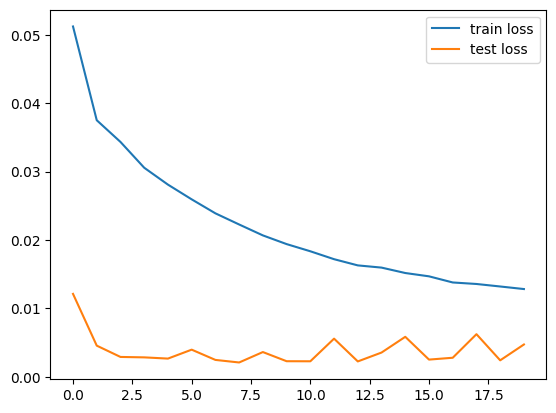

In [ ]:
plt.plot( r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [ ]:
train_idx[:T] = False # First T+1 values are not predictable

In [ ]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

1/1 [==============================] - 0s 23ms/step


In [ ]:
# Store diff predictions
df.loc[train_idx, 'Log ANN train prediction'] = Ptrain
df.loc[test_idx, 'Log ANN test prediction'] = Ptest

In [ ]:
cols = ['LogAAPL', 'Log ANN train prediction', 'Log ANN test prediction']

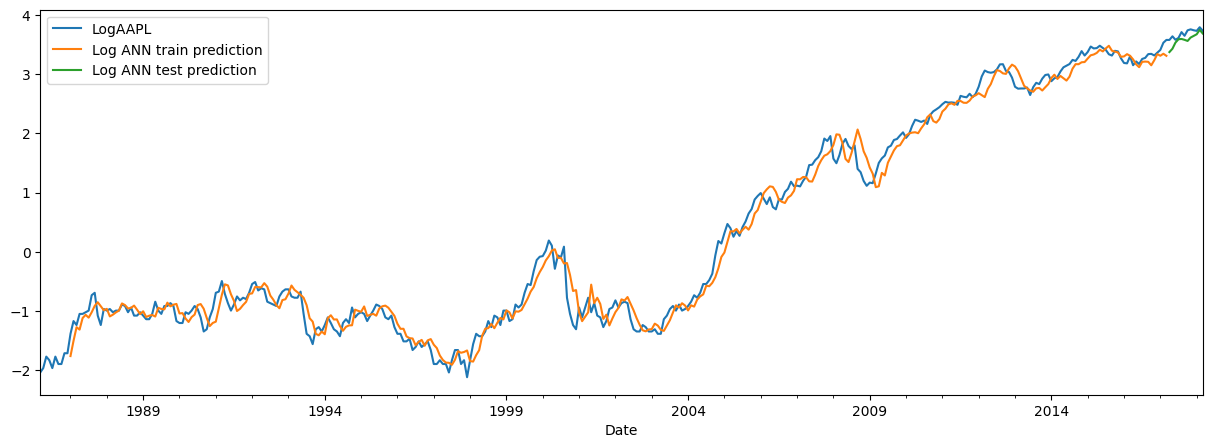

In [ ]:
df[cols].plot(figsize = (15,5));

In [ ]:
# Needed to compute un-differenciated predictions
df['ShiftLogAAPL'] = df['LogAAPL'].shift(1)
prev = df['ShiftLogAAPL']

In [ ]:
# Last know train value
last_train = train.iloc[-1]['LogAAPL']

In [ ]:
last_train

3.581294243433999

In [ ]:
# 1-Step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

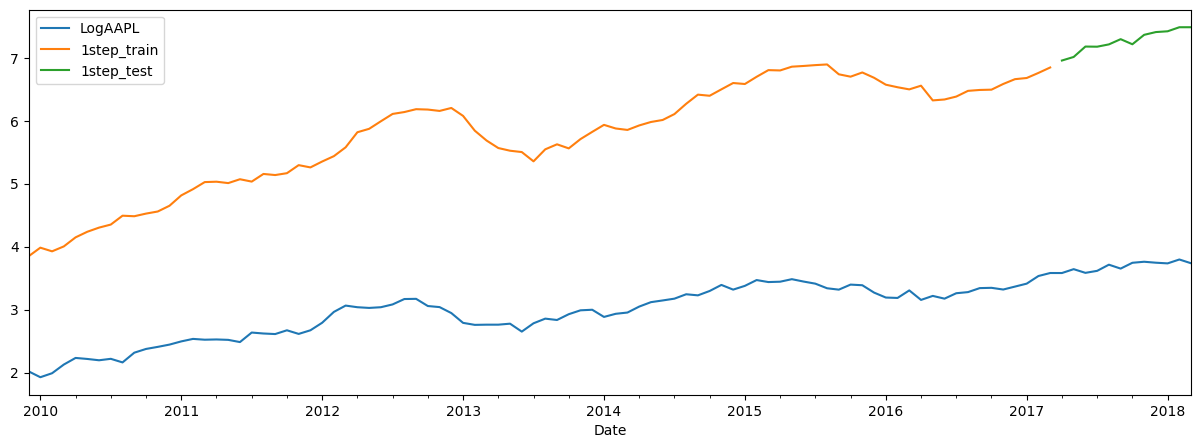

In [ ]:
# 1-step forecast
df.iloc[-100:][['LogAAPL', '1step_train', '1step_test']].plot(figsize= (15,5));

##Multistep forecast

In [ ]:
multistep_predictions = []
# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1,-1))[0]
  #update the predictions list
  multistep_predictions.append(p)
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 20ms/step


In [ ]:
# unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1,1)).flatten()

In [ ]:
# save multistep forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

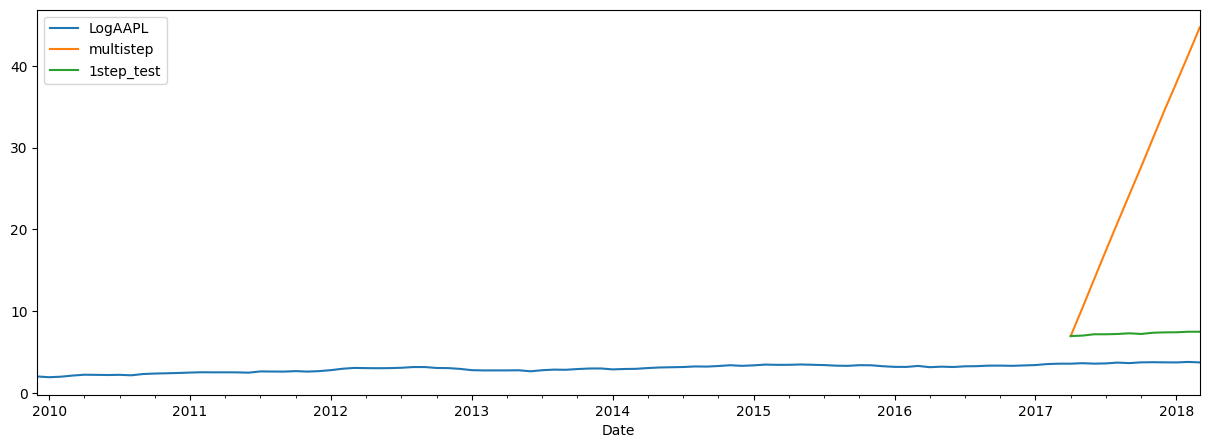

In [ ]:
# plot 1-step and multistep forecast
df[-100:][['LogAAPL', 'multistep', '1step_test']].plot(figsize= (15,5));

In [ ]:
Tx = T
Ty = Ntest
X = []
Y = []

for t in range(len(series)- Tx -Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t + Tx: t + Tx + Ty]
  Y.append(y)

X = np.array(X).reshape(-1,Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (364, 10) Y.shape (364, 12)


In [ ]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [ ]:
# Basic ANN
i = Input(shape = (Tx,))
X = Dense(32, activation = 'relu')(i)
X = Dense(Ty)(X)
model = Model(i,X)


In [ ]:
model.compile( loss='mse', optimizer='adam')

In [ ]:
r = model.fit(Xtrain_m,
              Ytrain_m, 
              epochs = 15,
              validation_data=(Xtest_m, Ytest_m) 
              )

Epoch 1/15
12/12 [==============================] - 1s 10ms/step - loss: 0.8233 - val_loss: 2.2365
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 0.6021 - val_loss: 1.6861
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 0.4360 - val_loss: 1.2649
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 0.3156 - val_loss: 0.9214
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 0.2291 - val_loss: 0.6664
Epoch 6/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1667 - val_loss: 0.4763
Epoch 7/15
12/12 [==============================] - 0s 5ms/step - loss: 0.1250 - val_loss: 0.3342
Epoch 8/15
12/12 [==============================] - 0s 3ms/step - loss: 0.0971 - val_loss: 0.2250
Epoch 9/15
12/12 [==============================] - 0s 4ms/step - loss: 0.0783 - val_loss: 0.1487
Epoch 10/15
12/12 [==============================] - 0s 3ms/step - loss: 0.0659 - val_loss: 0.0924
Epoch 11/15
12/12 

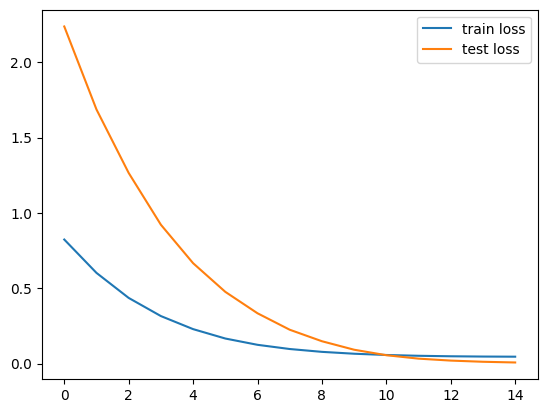

In [ ]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [ ]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)
Ptrain.shape, Ptest.shape

1/1 [==============================] - 0s 15ms/step


((363, 12), (1, 12))

In [ ]:
Ptrain = Ptrain[:, 0]
Ptest = Ptest[0]

In [ ]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1,1)).flatten()

In [ ]:
# Save multioutput to dataframe
df.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

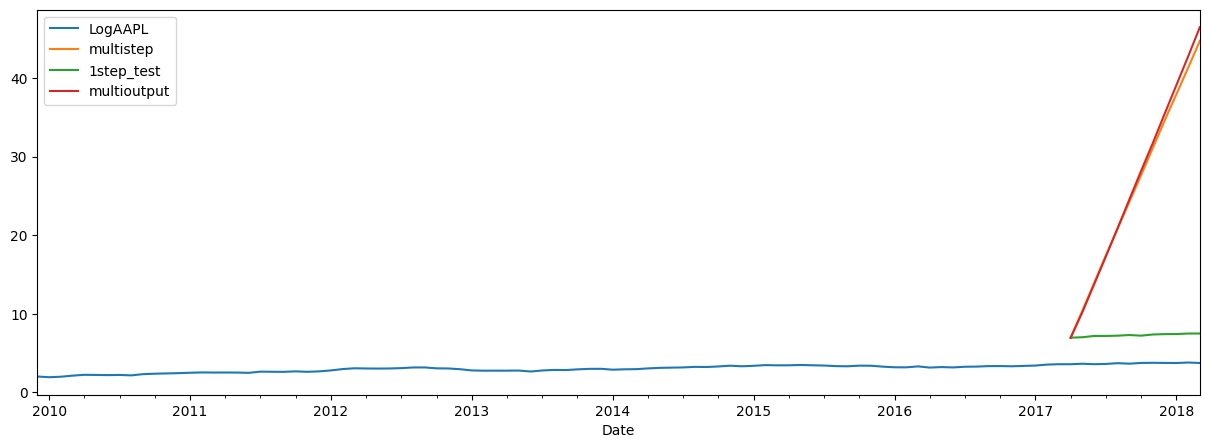

In [ ]:
# Plot all forecast

cols = ['LogAAPL', 'multistep', '1step_test', 'multioutput']
df.iloc[-100:][cols].plot(figsize= (15,5));

##Sin el Logaritmo

In [ ]:
#Cargo mis datos
df1 = pd.read_excel("/content/gdrive/MyDrive/Maestria/Segundo Semestre/Metodos Estadisticos Avanzados/ACCIONES.xlsx", index_col=0, parse_dates= True)

In [ ]:
#Ahora le saco la diferencia al logaritmo de la acción para lograr hacer constante la media y la varianza
df1['DiffAAPL'] = df['AAPL'].diff()

In [ ]:
#Visualizo los datos
df1.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,DiffAAPL
Date,,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78,NaN
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30,0.01
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71,0.03
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80,-0.01
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30,-0.02


In [ ]:
Ntest = 12
train = df1.iloc[: -Ntest]
test = df1.iloc[-Ntest:]
train_scaled1 = scaler.fit_transform(train[['DiffAAPL']])
test_scaled1 = scaler.transform(test[['DiffAAPL']])

In [ ]:
# Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
df1.loc[train_idx, 'ScaledLogReturn'] = train_scaled1.flatten()
df1.loc[test_idx, 'ScaledLogReturn'] = test_scaled1.flatten()

In [ ]:
df1.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,DiffAAPL,ScaledLogReturn
Date,,,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78,NaN,NaN
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30,0.01,-0.113920
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71,0.03,-0.087491
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80,-0.01,-0.140348
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30,-0.02,-0.153562


In [ ]:
# Make a supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []

for t in range(len(series) -T):
  x = series[t: t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
  
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (375, 10) Y.shape (375,)


In [ ]:
Xtrain, Ytrain = X[: -Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [ ]:
# Basic ANN

i = Input(shape = (T,))
x = Dense(32, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i,x)

In [ ]:
model.compile(loss= "mse", optimizer = 'adam', metrics= 'mae')

In [ ]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs = 20,
    validation_data = (Xtest, Ytest)
    )

Epoch 1/20
12/12 [==============================] - 1s 15ms/step - loss: 0.4500 - mae: 0.4692 - val_loss: 1.1590 - val_mae: 1.0760
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1198 - mae: 0.2515 - val_loss: 0.1023 - val_mae: 0.3181
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0259 - mae: 0.1254 - val_loss: 0.0044 - val_mae: 0.0567
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0247 - mae: 0.1225 - val_loss: 0.0112 - val_mae: 0.0973
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0222 - mae: 0.1161 - val_loss: 0.0016 - val_mae: 0.0335
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0193 - mae: 0.1078 - val_loss: 0.0060 - val_mae: 0.0675
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0184 - mae: 0.1065 - val_loss: 0.0066 - val_mae: 0.0722
Epoch 8/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0176 - mae: 0.1

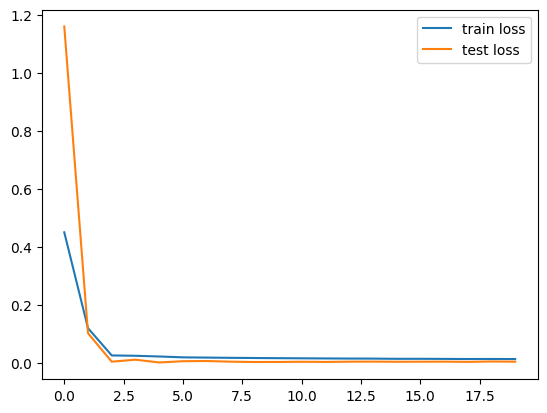

In [ ]:
plt.plot( r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [ ]:
train_idx[:T] = False # First T+1 values are not predictable

In [ ]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

1/1 [==============================] - 0s 17ms/step


In [ ]:
# Store diff predictions
df1.loc[train_idx, 'Diff ANN train prediction'] = Ptrain
df1.loc[test_idx, 'Diff ANN test prediction'] = Ptest

In [ ]:
cols = ['DiffAAPL', 'Diff ANN train prediction', 'Diff ANN test prediction']

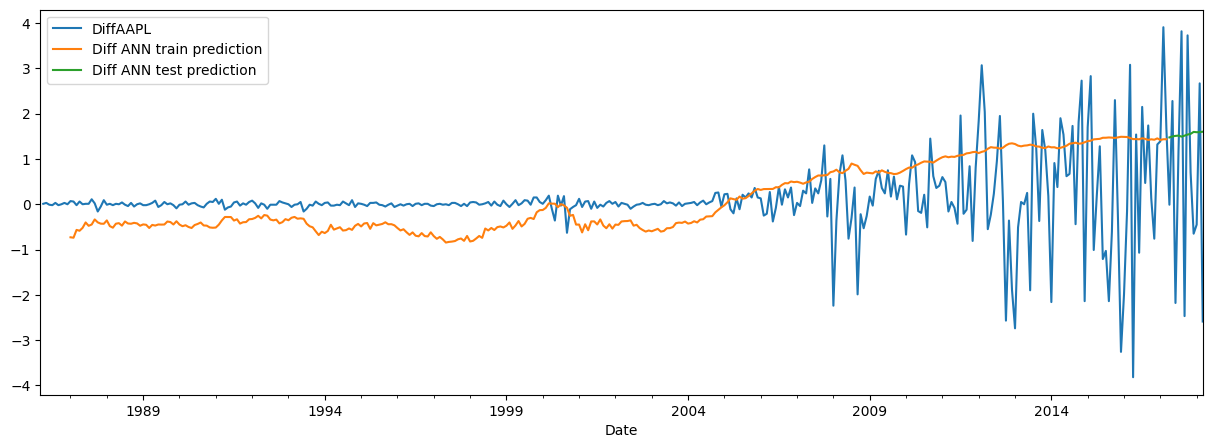

In [ ]:
df1[cols].plot(figsize = (15,5));

In [ ]:
# Needed to compute un-differenciated predictions
df1['ShiftAAPL'] = df1['AAPL'].shift(1)
prev = df1['ShiftAAPL']

In [ ]:
# Last know train value
last_train = train.iloc[-1]['AAPL']

In [ ]:
# 1-Step forecast
df1.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df1.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

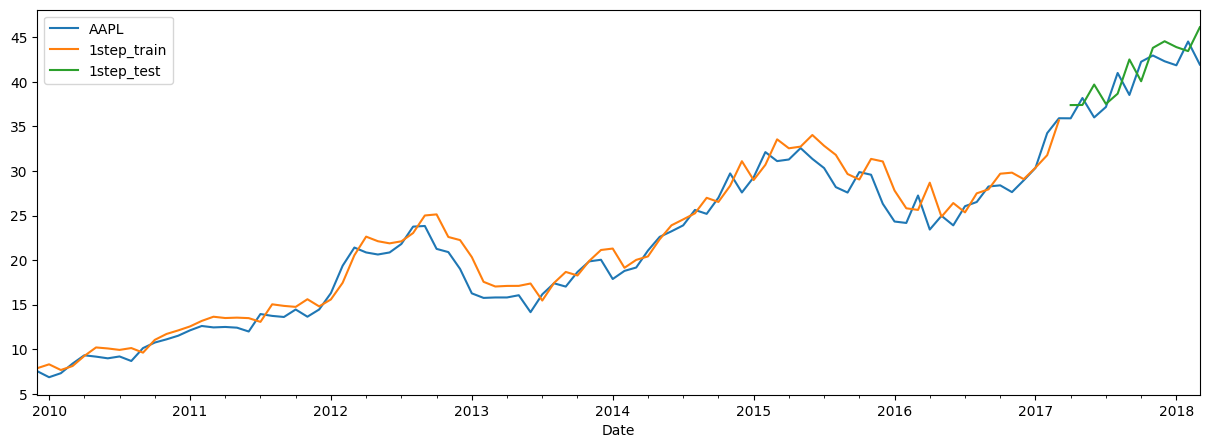

In [ ]:
# 1-step forecast
df1.iloc[-100:][['AAPL', '1step_train', '1step_test']].plot(figsize= (15,5));

In [ ]:
multistep_predictions = []
# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1,-1))[0]
  #update the predictions list
  multistep_predictions.append(p)
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 17ms/step


In [ ]:
# unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1,1)).flatten()

In [ ]:
# save multistep forecast to dataframe
df1.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

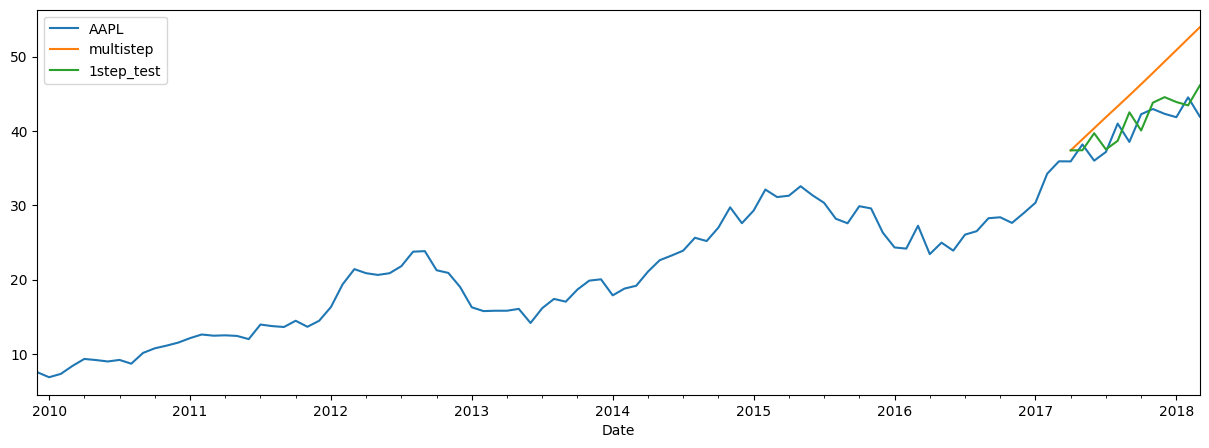

In [ ]:
# plot 1-step and multistep forecast
df1[-100:][['AAPL', 'multistep', '1step_test']].plot(figsize= (15,5));

In [ ]:
Tx = T
Ty = Ntest
X = []
Y = []

for t in range(len(series)- Tx -Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t + Tx: t + Tx + Ty]
  Y.append(y)

X = np.array(X).reshape(-1,Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (364, 10) Y.shape (364, 12)


In [ ]:
# Basic ANN
i = Input(shape = (Tx,))
X = Dense(32, activation = 'relu')(i)
X = Dense(Ty)(X)
model = Model(i,X)

In [ ]:
model.compile( loss='mse', optimizer='adam')

In [ ]:
r = model.fit(Xtrain_m,
              Ytrain_m, 
              epochs = 15,
              validation_data=(Xtest_m, Ytest_m) 
              )

Epoch 1/15
12/12 [==============================] - 0s 11ms/step - loss: 1.3534 - val_loss: 3.5370
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 0.9966 - val_loss: 2.3846
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 0.7260 - val_loss: 1.5636
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 0.5290 - val_loss: 0.9247
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 0.3767 - val_loss: 0.4854
Epoch 6/15
12/12 [==============================] - 0s 4ms/step - loss: 0.2616 - val_loss: 0.2132
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1805 - val_loss: 0.0769
Epoch 8/15
12/12 [==============================] - 0s 5ms/step - loss: 0.1276 - val_loss: 0.0224
Epoch 9/15
12/12 [==============================] - 0s 3ms/step - loss: 0.0932 - val_loss: 0.0070
Epoch 10/15
12/12 [==============================] - 0s 3ms/step - loss: 0.0742 - val_loss: 0.0035
Epoch 11/15
12/12 

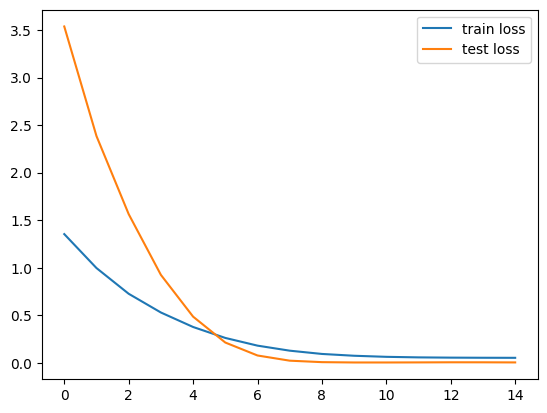

In [ ]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [ ]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)
Ptrain.shape, Ptest.shape

1/1 [==============================] - 0s 18ms/step


((363, 12), (1, 12))

In [ ]:
Ptrain = Ptrain[:, 0]
Ptest = Ptest[0]
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1,1)).flatten()

In [ ]:
# Save multioutput to dataframe
df1.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

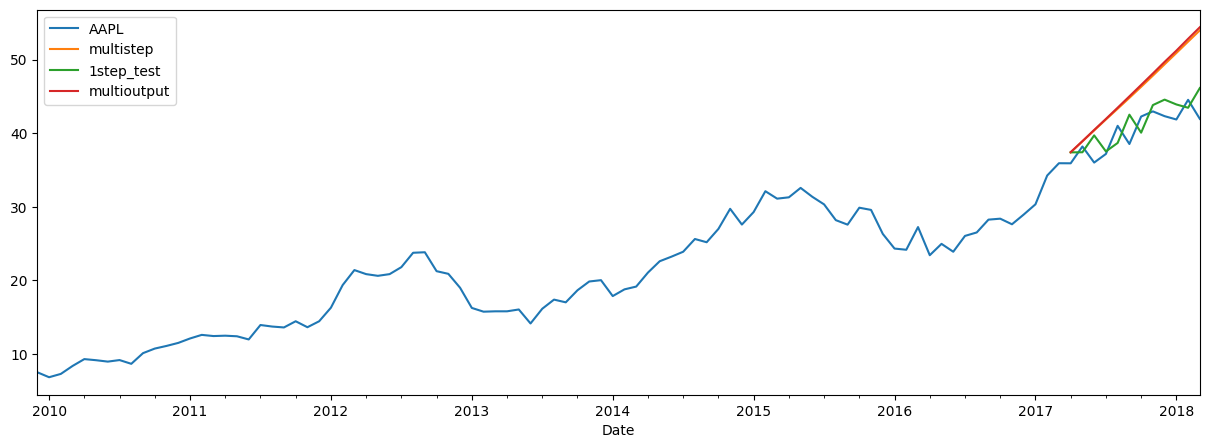

In [ ]:
# Plot all forecast

cols = ['AAPL', 'multistep', '1step_test', 'multioutput']
df1.iloc[-100:][cols].plot(figsize= (15,5));

##Teniendo en cuenta dos diferencias

In [ ]:
df2 = pd.read_excel("/content/gdrive/MyDrive/Maestria/Segundo Semestre/Metodos Estadisticos Avanzados/ACCIONES.xlsx", index_col=0, parse_dates= True)

In [ ]:
#Saco el Logaritmos natural de mis datos para hacer estacionaria mi serie de tiempo
df2['LogAAPL'] = np.log(df['AAPL'])
#Ahora le saco la diferencia al logaritmo de la acción para lograr hacer constante la media y la varianza
df2['DiffLogAAPL'] = df['LogAAPL'].diff(2)
#Visualizo los datos
df2.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,LogAAPL,DiffLogAAPL
Date,,,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78,-2.040221,NaN
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30,-1.966113,NaN
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71,-1.771957,0.268264
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80,-1.832581,0.133531
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30,-1.966113,-0.194156


In [ ]:
Ntest = 12
train = df2.iloc[: -Ntest]
test = df2.iloc[-Ntest:]

In [ ]:
train_scaled2 = scaler.fit_transform(train[['DiffLogAAPL']])
test_scaled2 = scaler.transform(test[['DiffLogAAPL']])

In [ ]:
# Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
df2.loc[train_idx, 'ScaledLogReturn'] = train_scaled2.flatten()
df2.loc[test_idx, 'ScaledLogReturn'] = test_scaled2.flatten()

In [ ]:
df2.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,LogAAPL,DiffLogAAPL,ScaledLogReturn
Date,,,,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78,-2.040221,NaN,NaN
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30,-1.966113,NaN,NaN
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71,-1.771957,0.268264,1.228773
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80,-1.832581,0.133531,0.534000
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30,-1.966113,-0.194156,-1.155782


In [ ]:
# Make a supervised dataset
series = df2['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []

for t in range(len(series) -T):
  x = series[t: t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
  
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (373, 10) Y.shape (373,)


In [ ]:
Xtrain, Ytrain = X[: -Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [ ]:
# Basic ANN

i = Input(shape = (T,))
x = Dense(32, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i,x)

In [ ]:
model.compile(loss= "mse", optimizer = 'adam', metrics= 'mae')

In [ ]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs = 20,
    validation_data = (Xtest, Ytest)
    )

Epoch 1/20
12/12 [==============================] - 1s 13ms/step - loss: 1.0199 - mae: 0.7658 - val_loss: 0.0522 - val_mae: 0.1759
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.9113 - mae: 0.7185 - val_loss: 0.0483 - val_mae: 0.1730
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 0.8476 - mae: 0.6884 - val_loss: 0.0484 - val_mae: 0.1768
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.7888 - mae: 0.6612 - val_loss: 0.0503 - val_mae: 0.1792
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.7501 - mae: 0.6402 - val_loss: 0.0524 - val_mae: 0.1816
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7154 - mae: 0.6226 - val_loss: 0.0551 - val_mae: 0.1867
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6895 - mae: 0.6110 - val_loss: 0.0575 - val_mae: 0.1926
Epoch 8/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6655 - mae: 0.5

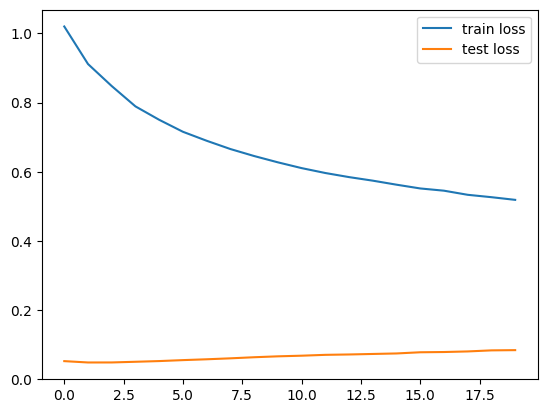

In [ ]:
plt.plot( r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [ ]:
train_idx[:T+2] = False

In [ ]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

1/1 [==============================] - 0s 23ms/step


In [ ]:
# Store diff predictions
df2.loc[train_idx, 'Diff ANN train prediction'] = Ptrain
df2.loc[test_idx, 'Diff ANN test prediction'] = Ptest

In [ ]:
cols = ['DiffLogAAPL', 'Diff ANN train prediction', 'Diff ANN test prediction']

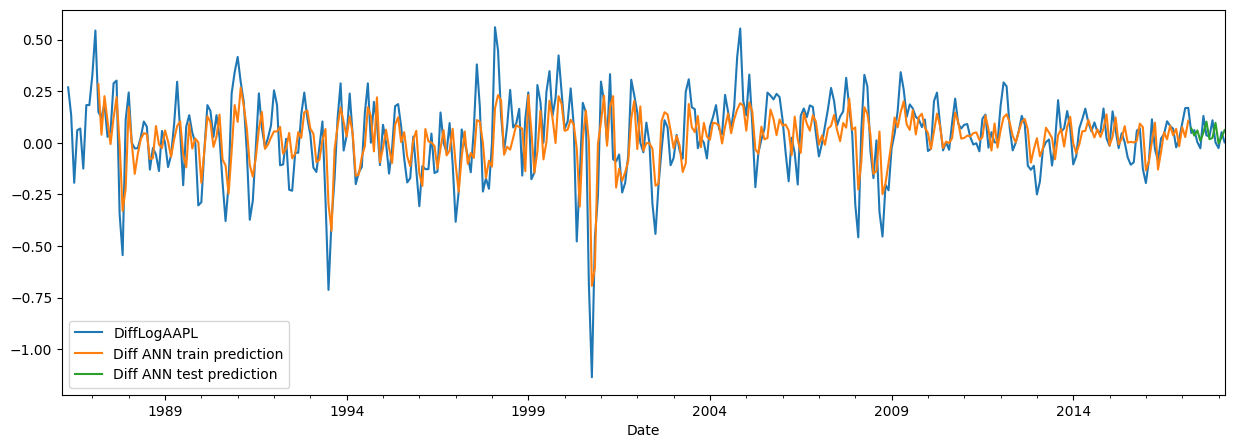

In [ ]:
df2[cols].plot(figsize = (15,5));

In [ ]:
# Needed to compute un-differenciated predictions
df2['ShiftLogAAPL'] = df2['LogAAPL'].shift(1)
prev = df2['ShiftLogAAPL']

In [ ]:
# Last know train value
last_train = train.iloc[-1]['LogAAPL']

In [ ]:
# 1-Step forecast
df2.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df2.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

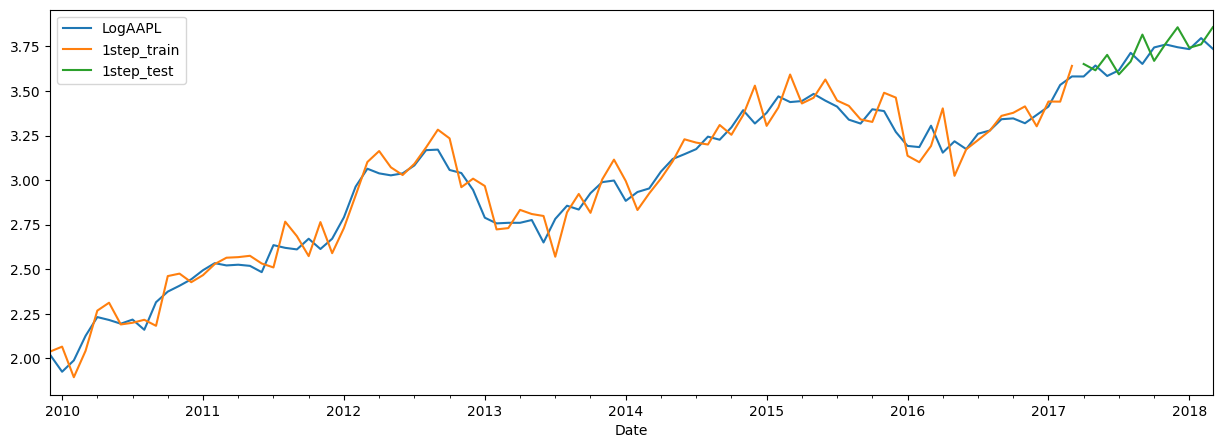

In [ ]:
# 1-step forecast
df2.iloc[-100:][['LogAAPL', '1step_train', '1step_test']].plot(figsize= (15,5));

In [ ]:
multistep_predictions = []
# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1,-1))[0]
  #update the predictions list
  multistep_predictions.append(p)
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 16ms/step


In [ ]:
# unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1,1)).flatten()

In [ ]:
# save multistep forecast to dataframe
df2.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

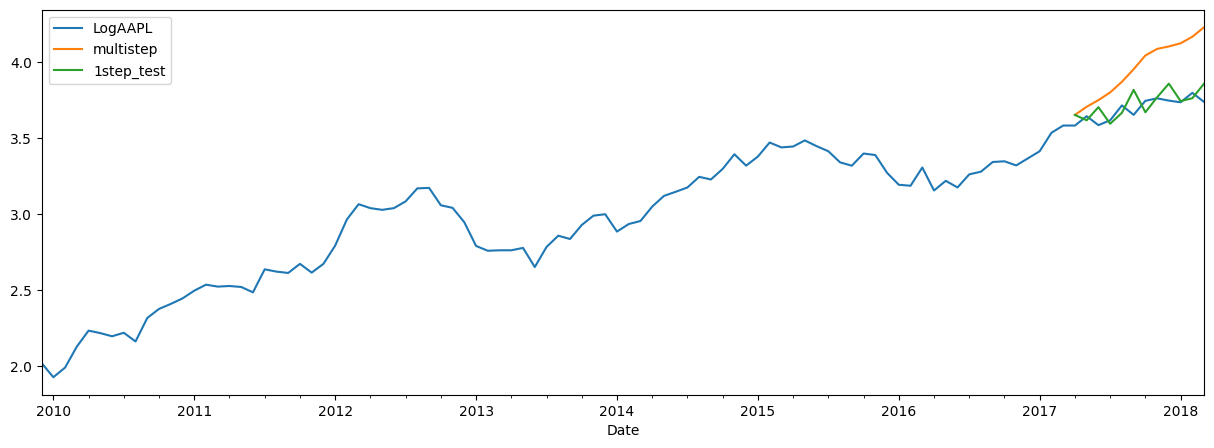

In [ ]:
# plot 1-step and multistep forecast
df2[-100:][['LogAAPL', 'multistep', '1step_test']].plot(figsize= (15,5));

In [ ]:
Tx = T
Ty = Ntest
X = []
Y = []

for t in range(len(series)- Tx -Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t + Tx: t + Tx + Ty]
  Y.append(y)

X = np.array(X).reshape(-1,Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (362, 10) Y.shape (362, 12)


In [ ]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [ ]:
# Basic ANN
i = Input(shape = (Tx,))
X = Dense(32, activation = 'relu')(i)
X = Dense(Ty)(X)
model = Model(i,X)

In [ ]:
model.compile( loss='mse', optimizer='adam')

In [ ]:
r = model.fit(Xtrain_m,
              Ytrain_m, 
              epochs = 15,
              validation_data=(Xtest_m, Ytest_m) 
              )

Epoch 1/15
12/12 [==============================] - 1s 12ms/step - loss: 1.3265 - val_loss: 0.0420
Epoch 2/15
12/12 [==============================] - 0s 5ms/step - loss: 1.2262 - val_loss: 0.0425
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 1.1590 - val_loss: 0.0458
Epoch 4/15
12/12 [==============================] - 0s 4ms/step - loss: 1.1107 - val_loss: 0.0497
Epoch 5/15
12/12 [==============================] - 0s 4ms/step - loss: 1.0747 - val_loss: 0.0521
Epoch 6/15
12/12 [==============================] - 0s 5ms/step - loss: 1.0478 - val_loss: 0.0552
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 1.0280 - val_loss: 0.0573
Epoch 8/15
12/12 [==============================] - 0s 3ms/step - loss: 1.0120 - val_loss: 0.0598
Epoch 9/15
12/12 [==============================] - 0s 3ms/step - loss: 0.9986 - val_loss: 0.0604
Epoch 10/15
12/12 [==============================] - 0s 4ms/step - loss: 0.9879 - val_loss: 0.0611
Epoch 11/15
12/12 

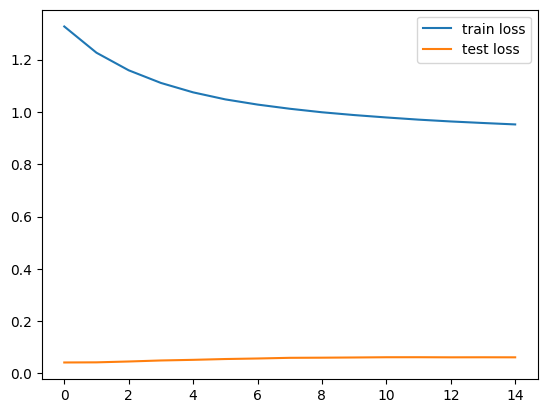

In [ ]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

In [ ]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)
Ptrain.shape, Ptest.shape

1/1 [==============================] - 0s 15ms/step


((361, 12), (1, 12))

In [ ]:
Ptrain = Ptrain[:, 0]
Ptest = Ptest[0]

In [ ]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1,1)).flatten()

In [ ]:
# Save multioutput to dataframe
df2.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

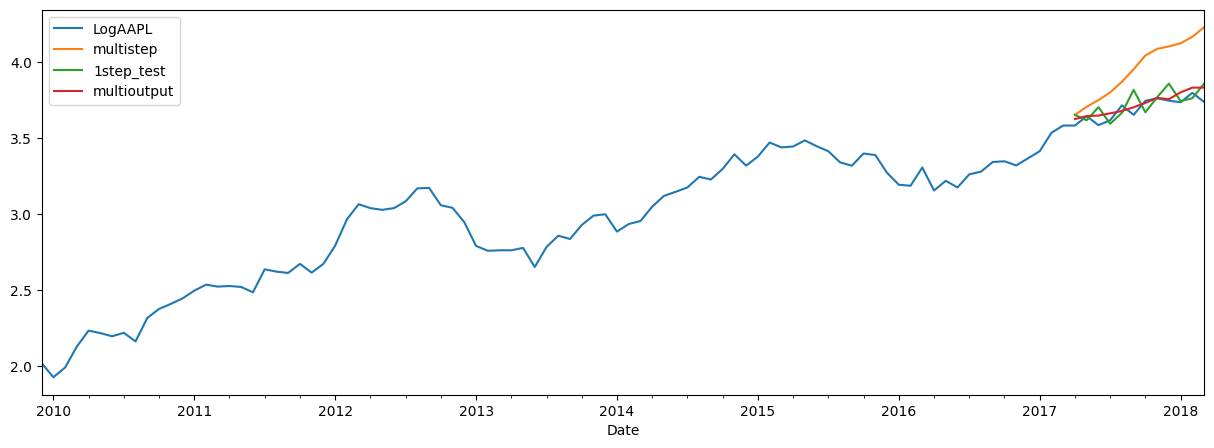

In [ ]:
# Plot all forecast

cols = ['LogAAPL', 'multistep', '1step_test', 'multioutput']
df2.iloc[-100:][cols].plot(figsize= (15,5));